In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [5]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

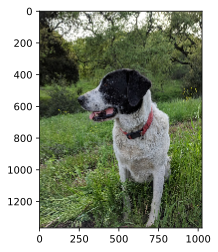

In [6]:
plt.imshow(full)

In [11]:
full.shape

(1367, 1025, 3)

In [7]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

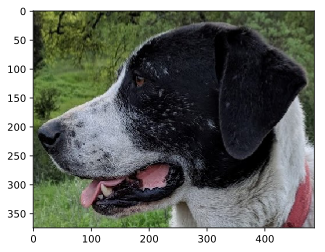

In [9]:
plt.imshow(face)

In [10]:
face.shape

(375, 486, 3)

In [12]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [15]:
method = eval('cv2.TM_CCOEFF')
result = cv2.matchTemplate(full,face,method)

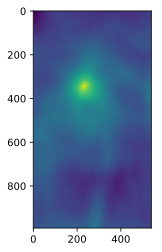

In [17]:
plt.imshow(result)

In [49]:
fig, ax = plt.subplots(6,2,figsize=(10,30))

for i,m in enumerate(methods):
    full_copy = full.copy()
    method = eval(m)
    result = cv2.matchTemplate(full_copy,face,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channles = face.shape
    buttom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,buttom_right,(255,0,0),5)
    
    ax[i,0].imshow(result)
    ax[i,0].set_title('result of template matching')
    ax[i,0].set_xticks([])
    ax[i,0].set_yticks([])

    
    ax[i,1].imshow(full_copy)
    ax[i,1].set_title(f'detection of template,method:{m}')
    ax[i,1].set_xticks([])
    ax[i,1].set_yticks([])

plt.tight_layout()